# Basic FNN in Keras

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


## Sequential API

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.04725807, 0.0933237 , 0.05538778, 0.09127998, 0.05819596,
        0.10874406, 0.13523832, 0.19446936, 0.11799464, 0.09810812]],
      dtype=float32)

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.09477995, 0.09924818, 0.09555363, 0.09904556, 0.09582234,
        0.10079049, 0.10349654, 0.10981194, 0.10172718, 0.09972417]],
      dtype=float32)

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.2947114

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2992 - accuracy: 0.9132
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1105 - accuracy: 0.9668
Epoch 4/5
 851/1875 [============>.................] - ETA: 2s - loss: 0.0890 - accuracy: 0.9739

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0768 - accuracy: 0.9764 - 589ms/epoch - 2ms/step


[0.07678690552711487, 0.9764000177383423]

In [ ]:
pred = model.predict(x_test[0:5,:])

In [ ]:
pred

array([[2.68897953e-08, 6.38350084e-09, 4.50193556e-06, 1.60271986e-04,
        2.43607413e-12, 1.49427876e-07, 1.59843235e-13, 9.99833703e-01,
        2.26464163e-08, 1.23165432e-06],
       [4.50261979e-08, 3.41539708e-05, 9.99925613e-01, 3.84713785e-05,
        3.81859764e-16, 9.82424467e-07, 1.60837637e-08, 5.75715216e-14,
        7.28320629e-07, 1.28722906e-13],
       [1.51846587e-06, 9.98345733e-01, 4.48532286e-04, 4.21960867e-05,
        8.33916329e-06, 1.43858797e-05, 9.76702086e-06, 7.84582575e-04,
        3.43651132e-04, 1.23726204e-06],
       [9.99960303e-01, 6.31771802e-10, 2.60004072e-05, 1.88768706e-06,
        2.58255128e-09, 4.11188637e-07, 7.15349506e-06, 2.20845706e-07,
        1.19190675e-08, 4.09705308e-06],
       [8.23225662e-07, 4.52339322e-09, 1.60072323e-05, 5.57864119e-08,
        9.99280274e-01, 2.07623032e-07, 1.92088874e-06, 8.35757528e-05,
        6.17605110e-07, 6.16474426e-04]], dtype=float32)

In [ ]:
import numpy as np
np.argmax(pred,axis=1)

array([7, 2, 1, 0, 4])

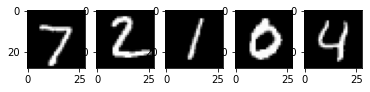

In [ ]:
# plot the images to confirm
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,5)
for i in range(5):
	axs[i].imshow( np.reshape(x_test[i,:],(28,28)), cmap='gray' )
fig.show()

In [ ]:
whos

Variable      Type                             Data/Info
--------------------------------------------------------
axs           ndarray                          5: 5 elems, type `object`, 40 bytes
fig           Figure                           Figure(432x288)
i             int                              4
loss_fn       SparseCategoricalCrossentropy    <keras.losses.SparseCateg<...>object at 0x7f87acf5f910>
mnist         module                           <module 'keras.api._v2.ke<...>asets/mnist/__init__.py'>
model         Sequential                       <keras.engine.sequential.<...>object at 0x7f87b0d10ed0>
np            module                           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt           module                           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
pred          ndarray                          5x10: 50 elems, type `float32`, 200 bytes
predictions   ndarray                          1x10: 10 elems, type `float32`, 40 bytes

## Functional API

In [ ]:
# ล้าง VM ให้หมดแล้วสร้างอันใหม่
!kill -9 -1

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
out = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(input, out)

In [ ]:
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
pred = model.predict(x_test[0:5,:])

In [ ]:
import numpy as np
np.argmax(pred,axis=1)

In [ ]:
# plot the images to confirm
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,5)
for i in range(5):
	axs[i].imshow( np.reshape(x_test[i,:],(28,28)), cmap='gray' )
fig.show()